In [1]:
import jax

In [2]:
jax.__version__

'0.4.19'

In [3]:
jax.devices()

[CpuDevice(id=0)]

In [2]:
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from cge_modeling.pytensorf.compile import build_euler_approximation_function

In [3]:
variables = v1, v2 = [pt.dscalar(name) for name in ["v1", "v2"]]
parameters = v3 = pt.dscalar("v3")
inputs = variables + parameters

equations = [v1**2 * v3 - 1, v1 + v2 - 2]

In [4]:
f_1 = build_euler_approximation_function(equations, variables, [parameters], n_steps=1)
f_10 = build_euler_approximation_function(equations, variables, [parameters], n_steps=10)
f_100 = build_euler_approximation_function(equations, variables, [parameters], n_steps=100)
f_10k = build_euler_approximation_function(equations, variables, [parameters], n_steps=10_000)

In [8]:
def f_analytic(v3):
    v1 = 1 / np.sqrt(v3)
    v2 = 2 - v1
    return np.array([v1, v2])

In [11]:
initial_point = [1, 1]
v3_initial = 1
v3_final = 2

analytic_solution = np.array(f_analytic(v3_final))

In [12]:
approximate_solutions = [
    f(*initial_point, v3_initial, np.array([v3_final]))[0] for f in [f_1, f_10, f_100, f_10k]
]
errors = np.c_[[solution[-1] - analytic_solution for solution in approximate_solutions]]

In [16]:
np.diff(np.abs(errors), axis=0)

array([[-0.19329227, -0.19329227],
       [-0.01248328, -0.01248328],
       [-0.00131797, -0.00131797]])

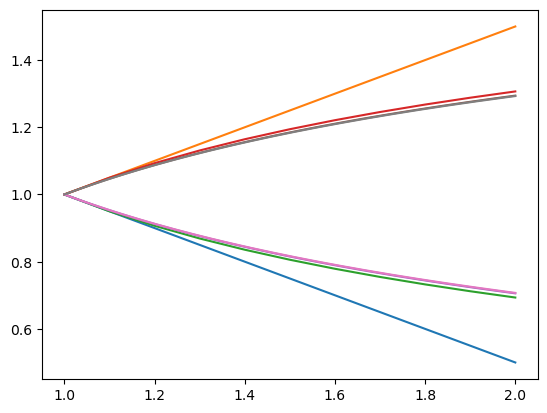

In [32]:
fig, ax = plt.subplots()
for f in [f_1, f_10, f_100, f_10k]:
    x, theta = f(1.0, 1.0, 1.0, np.array([2.0]))
    ax.plot(theta.ravel(), x)

In [ ]:
variables = v1, v2 = [pt.dscalar(name) for name in ["v1", "v2"]]
parameters = v3 = pt.dscalar("v3")
inputs = variables + parameters

equations = [v1**2 * v3 - 1, v1 + v2 - 2]


def f_analytic(v3):
    v1 = 1 / np.sqrt(v3)
    v2 = 2 - v1
    return v1, v2


mode = "FAST_COMPILE"
f_1 = build_euler_approximation_function(equations, variables, [parameters], n_steps=1, mode=mode)
f_10 = build_euler_approximation_function(equations, variables, [parameters], n_steps=10, mode=mode)
f_100 = build_euler_approximation_function(
    equations, variables, [parameters], n_steps=100, mode=mode
)
f_10k = build_euler_approximation_function(
    equations, variables, [parameters], n_steps=10_000, mode=mode
)

initial_point = [1, 1]
v3_initial = 1
v3_final = 2

analytic_solution = np.array(f_analytic(v3_final))
print(analytic_solution)